In [63]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf

from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.compat import lzip
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# not all of these libaries were used 

import warnings
warnings.filterwarnings("ignore")


In [64]:
data = pd.read_csv("car data.csv") # read the data as a csv file 
data.head(5) # first 5 rows 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [65]:
data.isnull().any() # we have no missing values 
data.isnull().sum() # in the event in which we did have missing values, this would tell us how many 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [66]:
data.describe() # get summary statistics of each column in the dataset 

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


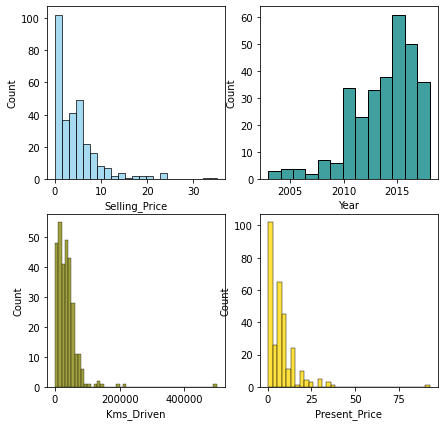

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data["Selling_Price"], color = "skyblue", ax=axs[0, 0])
sns.histplot(data["Year"], color = "teal", ax=axs[0, 1])
sns.histplot(data["Kms_Driven"], color = "olive", ax=axs[1, 0])
sns.histplot(data["Present_Price"], color = "gold", ax=axs[1, 1])



From the plots above, we see that the selling price is not normally distributed. This fails one of the multiple linear regression assumptions. Let's transform the Selling Price by taking the log of all values. 

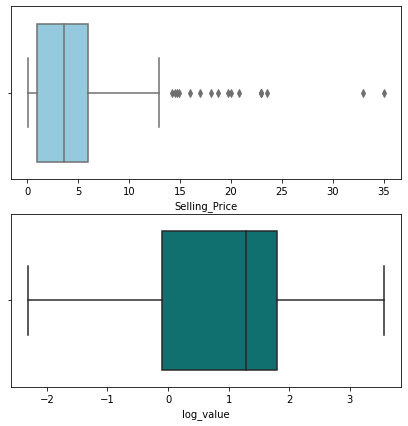

In [68]:
data['log_value'] = np.log(data['Selling_Price'])

selling_price = data["Selling_Price"]

log_value = data['log_value']


fig, axs = plt.subplots(2, 1, figsize=(7, 7))

sns.boxplot(data["Selling_Price"], color = "skyblue", ax=axs[0])
sns.boxplot(data["log_value"], color = "teal", ax=axs[1])

# here we can see that after the log transformation, log of selling price follows bell shape slightly closer. 

In [69]:
sns.pairplot(data) 

In [70]:
Categorical_Covariates = ['Car_Name',	'Fuel_Type',	'Seller_Type',	'Transmission',	'Owner'] # Crate a list of categorical covariates 

data_observations = data.drop(["Selling_Price", "log_value"], axis = 1)

data_target = data["log_value"]

data_new = pd.get_dummies(data_observations, columns = Categorical_Covariates) #convert categorical variables to dummy variables. 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data_new, data_target, random_state=0)

clf = LinearRegression()

stepwise_forward_selection = sfs(clf,k_features = 5,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
stepwise_froward_selection = stepwise_forward_selection.fit(X_train, y_train)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data_new, data_target, random_state=0)


train_score = []
test_score =[]

clf = LinearRegression()

for i in range(1,20): 
  sfs1 = sfs(clf,k_features = i,forward=True,floating=False, scoring='r2',cv=5)
  # Perform SFFS
  sfs1 = sfs1.fit(X_train, y_train)
  cols = list(sfs1.k_feature_names_)
  model_data = data_new.loc[:, data_new.columns.intersection(cols)]
  X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(model_data, data_target, random_state=0) 
  lr = LinearRegression().fit(X_train_new, y_train_new) # Fit a linear Regression Model 
  train_score.append(lr.score(X_train_new, y_train_new))
  test_score.append(lr.score(X_test_new, y_test_new))

Text(0, 0.5, 'Test Score')

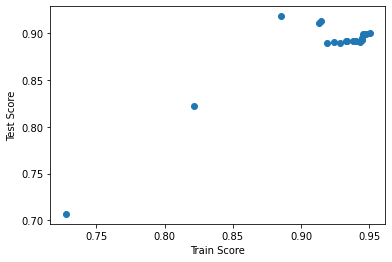

In [79]:
plt.scatter(train_score,test_score)
plt.xlabel("Train Score")
plt.ylabel("Test Score")

It is clear that after the 4th covariate the model starts to over fit the data. 